### **Amaç:** En küçük hata ile tahmin yapabilecek ağırlıklara erişmek.

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
mlpc_model = MLPClassifier().fit(X_train_scaled, y_train)

In [18]:
y_pred = mlpc_model.predict(X_test_scaled)

In [22]:
accuracy_score(y_test, y_test)

1.0

In [ ]:
# model tuning etme

In [35]:
mlpc_params = {"alpha": [1,5,0.1,0.001,0.005],
              "hidden_layer_sizes": [(10,10), (100,100,100), (3,5)]}

In [36]:
mlpc = MLPClassifier(solver = "adam", activation= "logistic")

In [37]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, n_jobs = -1).fit(X_train_scaled, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [38]:
mlpc_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100)}

In [43]:
mlpc_tuned =  MLPClassifier(solver = "adam", activation= "logistic", alpha=0.001, hidden_layer_sizes=(100,100,100)).fit(X_train_scaled, y_train)

In [45]:
y_pred = mlpc_tuned.predict(X_test_scaled)

In [47]:
accuracy_score(y_test, y_pred)

0.9969909729187563

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00        68
           2       0.95      1.00      0.97        52
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        45
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1

    accuracy                           1.00       997
   macro avg       0.71      0.64      0.66       997
weighted avg       1.00      1.00      1.00       997



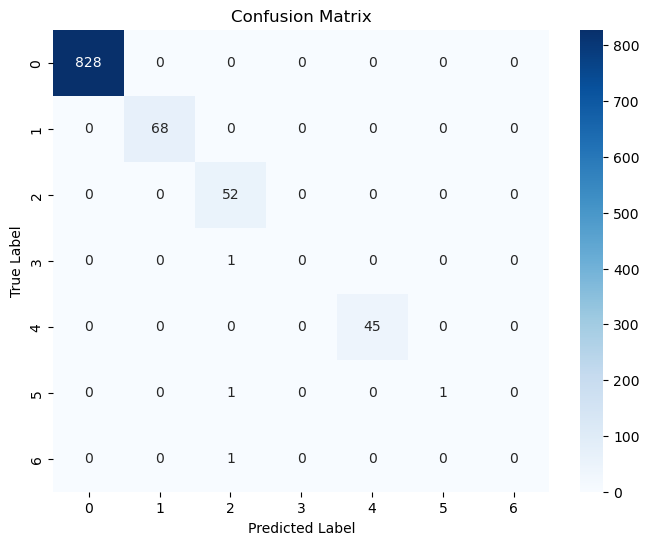

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = mlpc_tuned .predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

labels = sorted(y_test.unique()) 

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
df["BRCAstatesNew"].value_counts()

BRCAstatesNew
0    2758
1     227
2     174
4     150
5       7
6       4
3       2
Name: count, dtype: int64